In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import Image, display
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_image_path = '/content/drive/MyDrive/Capstone/Train/'
val_image_path = '/content/drive/MyDrive/Capstone/Val/'

In [ ]:
def load_images(img_path):
  imgs = []
  labels = []
  classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

  for c in range(len(classes)):
    dir = os.path.join(img_path, classes[c], 'images')

    for n in os.listdir(dir):
      path = os.path.join(dir, n)
      img = cv2.imread(path)
      img = cv2.resize(img, (256, 256))

      imgs.append(img)
      labels.append(c)
  return np.array(imgs), np.array(labels)

In [ ]:
(X_train, y_train) = load_images(train_image_path)
(X_test, y_test) = load_images(val_image_path)

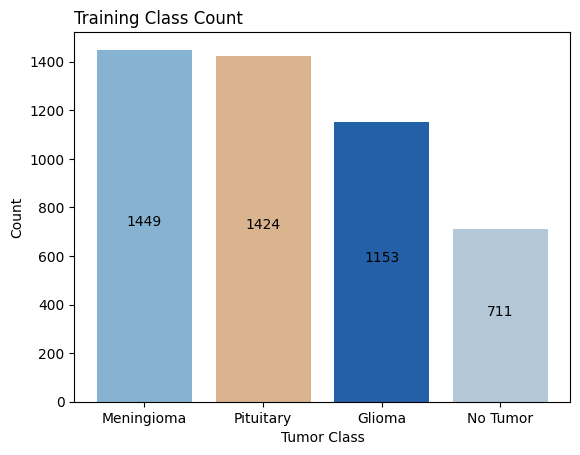

In [ ]:
# Code structure taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
fig, ax = plt.subplots()

classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
unique, counts = np.unique(y_train, return_counts=True)
colors = ['#2460A7FF', '#85B3D1FF', '#B3C7D6FF', '#D9B48FFF']

sorted_indices = np.argsort(counts)[::-1]
sorted_counts = counts[sorted_indices]
sorted_classes = np.array(classes)[sorted_indices]
sorted_colors = np.array(colors)[sorted_indices]

def addlabels(classes, counts):
  for c in range(len(classes)):
    plt.text(c, counts[c]//2, counts[c], ha = 'center')
ax.bar(sorted_classes, sorted_counts, color=sorted_colors)
addlabels(sorted_classes, sorted_counts)
plt.title('Training Class Count', loc='left')
plt.xlabel('Tumor Class')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Capstone/images/training-class-count.png', dpi=192);

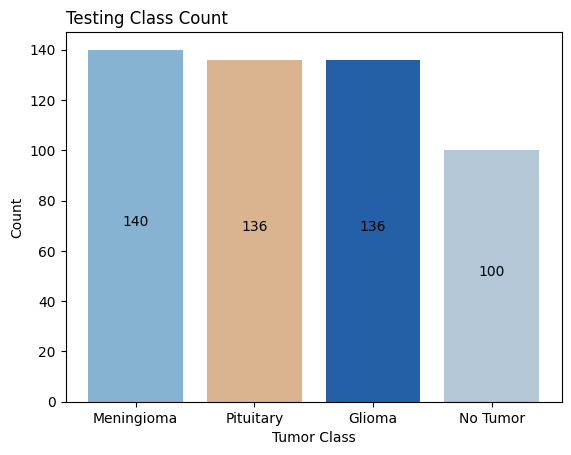

In [ ]:
fig, ax = plt.subplots()

classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
unique, counts = np.unique(y_test, return_counts=True)
colors = ['#2460A7FF', '#85B3D1FF', '#B3C7D6FF', '#D9B48FFF']

sorted_indices = np.argsort(counts)[::-1]
sorted_counts = counts[sorted_indices]
sorted_classes = np.array(classes)[sorted_indices]
sorted_colors = np.array(colors)[sorted_indices]

def addlabels(classes, counts):
  for c in range(len(classes)):
    plt.text(c, counts[c]//2, counts[c], ha = 'center')
ax.bar(sorted_classes, sorted_counts, color=sorted_colors)
addlabels(sorted_classes, sorted_counts)
plt.title('Testing Class Count', loc='left')
plt.xlabel('Tumor Class')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Capstone/images/testing-class-count.png', dpi=192);